In [1]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:08<00:00, 24.1MB/s]
100% 325M/325M [00:08<00:00, 39.0MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [6]:
test_dir = '/content/test'
training_dir = '/content/train'

In [11]:
training_benign_dir = os.path.join(training_dir,'benign')
training_malignant_dir = os.path.join(training_dir,'malignant')
test_benign_dir = os.path.join(test_dir,'benign')
test_malignant_dir = os.path.join(test_dir,'malignant')

In [12]:
print('Total training image for benign are :',len(os.listdir(training_benign_dir)))
print('Total training image for malignant are :',len(os.listdir(training_malignant_dir)))
print('Total test image for benign are :',len(os.listdir(test_benign_dir)))
print('Total test image for malignant are :',len(os.listdir(test_malignant_dir)))

Total training image for benign are : 1440
Total training image for malignant are : 1197
Total test image for benign are : 360
Total test image for malignant are : 300


In [21]:
training_benign_fnames = os.listdir(training_benign_dir)
print(training_benign_fnames[:10])

training_malignant_fnames = os.listdir(training_malignant_dir)
training_malignant_fnames.sort()
print(training_malignant_fnames[:10])

['980.jpg', '1585.jpg', '1726.jpg', '1095.jpg', '948.jpg', '1240.jpg', '39.jpg', '1084.jpg', '1178.jpg', '1156.jpg']
['10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1004.jpg', '1006.jpg', '1008.jpg', '101.jpg', '1010.jpg']


In [22]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

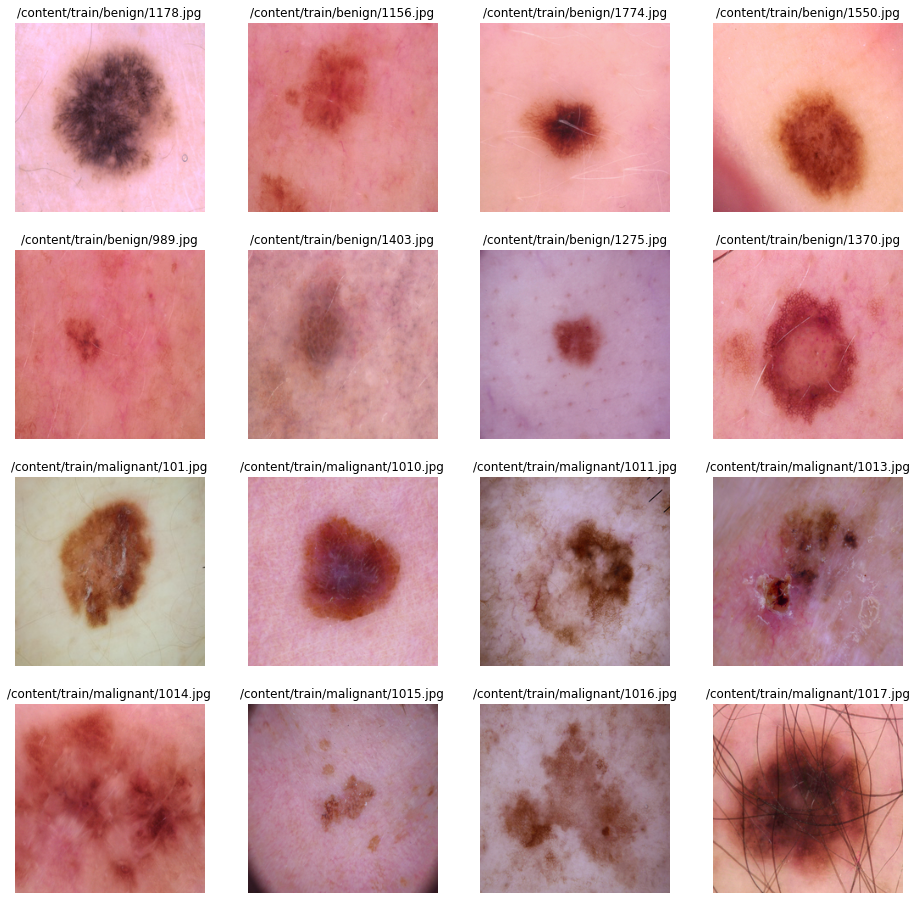

In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_benign_pix = [os.path.join(training_benign_dir, fname) 
                for fname in training_benign_fnames[pic_index-8:pic_index]]
next_malignant_pix = [os.path.join(training_malignant_dir, fname) 
                for fname in training_malignant_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path)

plt.show()
